### Sells by customer: multiple files 

In [2]:
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# path object (to the main file with all data)
path = Path('/Users/viktorial/viktoria/Karpov/Data/Data_for_python/data_customer/')

In [4]:
# create df for all data 
df = pd.DataFrame()

# read data from all folders and add it to general df
for current_path, dirs, files in os.walk(path):
     
    for file in files:
        if not file.startswith('.'):
            #path to file with csv file
            part_path = Path(current_path)
            
            #path to csv file
            data_path = part_path / file
            
            #Read data
            temp_df = pd.read_csv(data_path)

            #Extract date and name
            name = data_path.parts[-2]
            date = data_path.parts[-3]
            
            #Add columns date and name
            temp_df['date'] = date
            temp_df['name'] = name
            
            #Insert data into main df
            df = pd.concat((df, temp_df))

In [7]:
# take a look at df
df

,Unnamed: 0,product_id,quantity,date,name
0,0,56,4,2020-12-06,Vasiliy_Fedorov
1,1,97,3,2020-12-06,Vasiliy_Fedorov
2,2,79,3,2020-12-06,Vasiliy_Fedorov
3,3,29,5,2020-12-06,Vasiliy_Fedorov
0,0,73,5,2020-12-08,Alexey_Fedorov
...,...,...,...,...,...
1,1,3,4,2020-12-04,Kirill_Fedorov
2,2,89,5,2020-12-04,Kirill_Fedorov
3,3,75,2,2020-12-04,Kirill_Fedorov
4,4,41,5,2020-12-04,Kirill_Fedorov


In [8]:
# delete the 'Unnamed: 0' column 
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
#  What user made the most purchases?

In [11]:
df.head()

,product_id,quantity,date,name
0,56,4,2020-12-06,Vasiliy_Fedorov
1,97,3,2020-12-06,Vasiliy_Fedorov
2,79,3,2020-12-06,Vasiliy_Fedorov
3,29,5,2020-12-06,Vasiliy_Fedorov
4,73,5,2020-12-08,Alexey_Fedorov


In [16]:
df.groupby('name', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False).head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [ ]:
# What are the top-10 products by items sold?

In [17]:
# selecting top-10 products by items sold

top_10_sells = df.groupby('product_id', as_index=False) \
    .agg({'quantity':'sum'}) \
    .sort_values('quantity', ascending=False) \
    .head(10)
top_10_sells

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


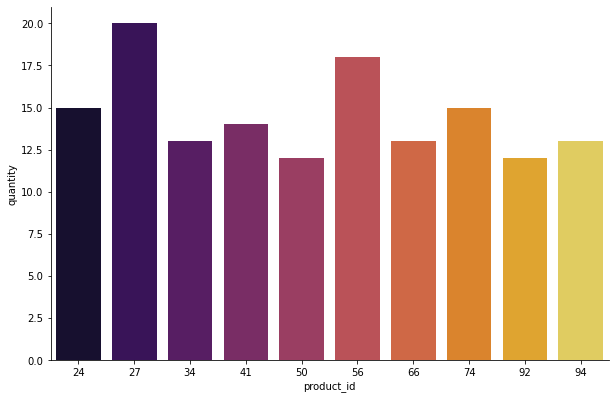

In [81]:
# adjusting barplot size 
plt.figure(figsize=(10, 6.5))

# creating barplot, adjusting colors
sns.barplot(data=top_10_sells, x='product_id', y='quantity',
           palette='inferno')

# taking off boundaries  
sns.despine()

In [ ]:
# Take a look at sells per day

<Figure size 720x468 with 0 Axes>

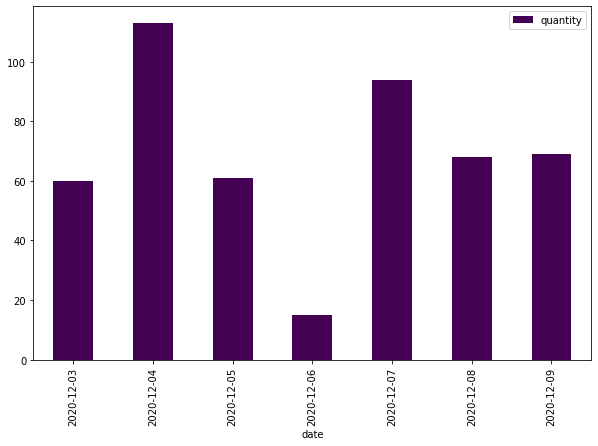

In [82]:
# purchases made by date in December
plt.figure(figsize=(10, 6.5))


sells_per_date = df.groupby('date') \
    .agg({'quantity':'sum'}) \
    .plot(kind='bar', figsize=(10, 6.5), colormap='viridis')

Most sells were made on Dec, 4th. Least - on Dec, 6th.

In [18]:
?

In [83]:
# remove duplicates in columns date, name, product_id
df.drop_duplicates(subset=['date', 'name', 'product_id'], inplace=True)

In [84]:
# find out what purchases were made multiple times per person
df.groupby(['name', 'product_id'], as_index=False) \
    .agg({'date': pd.Series.nunique}) \
    .rename(columns={'date':'times_purchased'}) \
    .query('times_purchased > 1')

,name,product_id,times_purchased
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


Two customers purchased a certain item multiple times